In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Mental_Health_Lifestyle_Dataset.csv')


 # 1. 단변량 분석 (Univariate Analysis)

In [ ]:
df.describe()

,Age,Sleep Hours,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,41.229667,6.475933,39.466333,5.089833,5.470200,5.395067
std,13.428416,1.499866,11.451459,1.747231,2.563532,2.557601
min,18.000000,1.400000,20.000000,2.000000,1.000000,1.000000
25%,30.000000,5.500000,30.000000,3.600000,3.300000,3.200000
50%,41.000000,6.500000,39.000000,5.100000,5.500000,5.400000
75%,53.000000,7.500000,50.000000,6.600000,7.600000,7.500000
max,64.000000,11.300000,59.000000,8.000000,10.000000,10.000000


수치형 히스토그램 분포

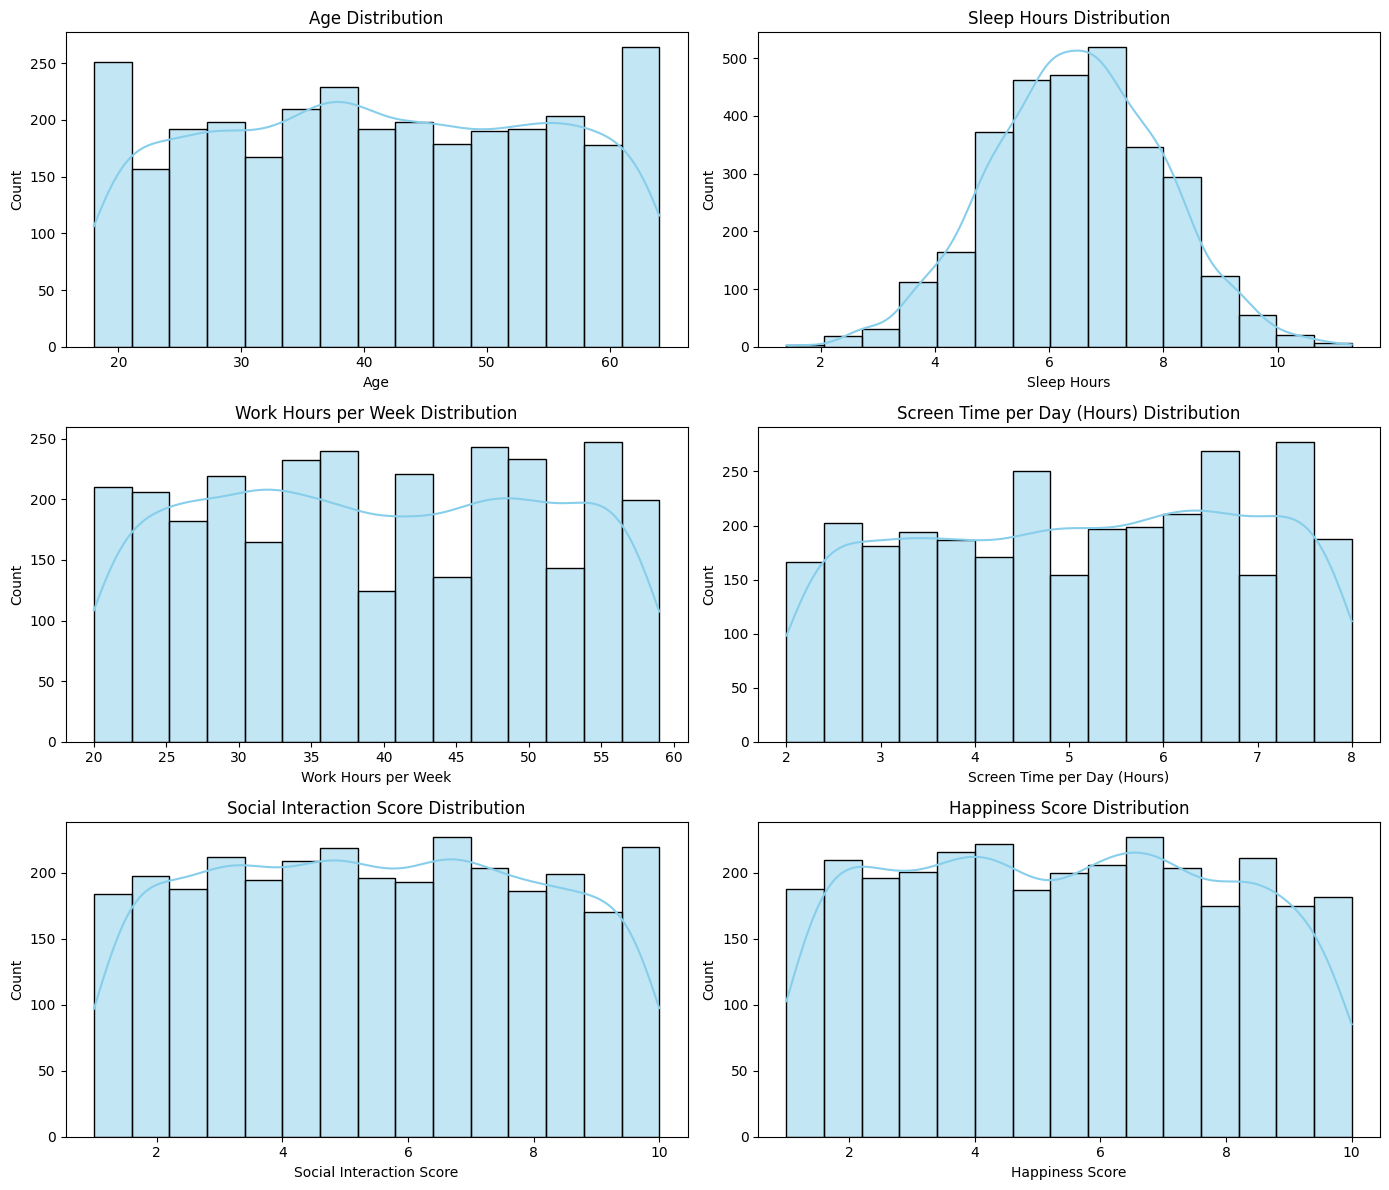

In [ ]:
cols = ['Age', 'Sleep Hours', 'Work Hours per Week',
        'Screen Time per Day (Hours)', 'Social Interaction Score', 'Happiness Score']

fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.histplot(data=df, x=col, kde=True, bins= 15, ax=axes[i], color='skyblue')
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

##수치형 데이터 시각화
### col : 수면시간, 스크린 타임, 근무 시간,사회적 상호작용

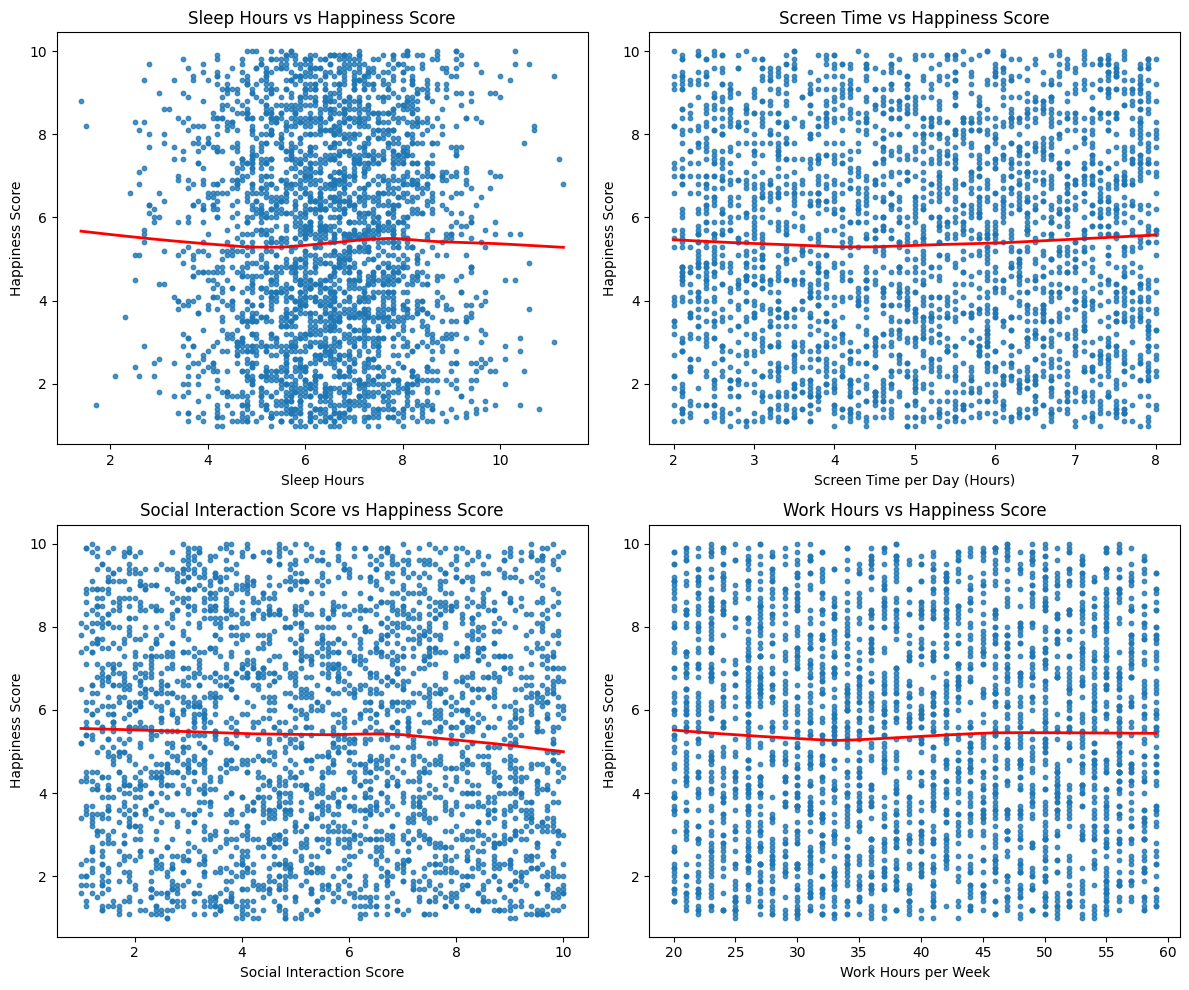

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Sleep Hours vs Happiness Score
sns.regplot(data=df, x='Sleep Hours', y='Happiness Score', ax=axes[0, 0], scatter_kws={'s': 10},line_kws={'color': 'red', 'lw': 2}, lowess=True)
axes[0, 0].set_title('Sleep Hours vs Happiness Score')

# Screen Time vs Happiness Score
sns.regplot(data=df, x='Screen Time per Day (Hours)', y='Happiness Score', ax=axes[0, 1], scatter_kws={'s': 10},line_kws={'color': 'red', 'lw': 2}, lowess=True)
axes[0, 1].set_title('Screen Time vs Happiness Score')

# Social Interaction Score vs Happiness Score
sns.regplot(data=df, x='Social Interaction Score', y='Happiness Score', ax=axes[1, 0], scatter_kws={'s': 10},line_kws={'color': 'red', 'lw': 2}, lowess=True)
axes[1, 0].set_title('Social Interaction Score vs Happiness Score')

# Work Hours per Week vs Happiness Score
sns.regplot(data=df, x='Work Hours per Week', y='Happiness Score', ax=axes[1, 1], scatter_kws={'s': 10},line_kws={'color': 'red', 'lw': 2}, lowess=True)
axes[1, 1].set_title('Work Hours vs Happiness Score')

plt.tight_layout()
plt.show()



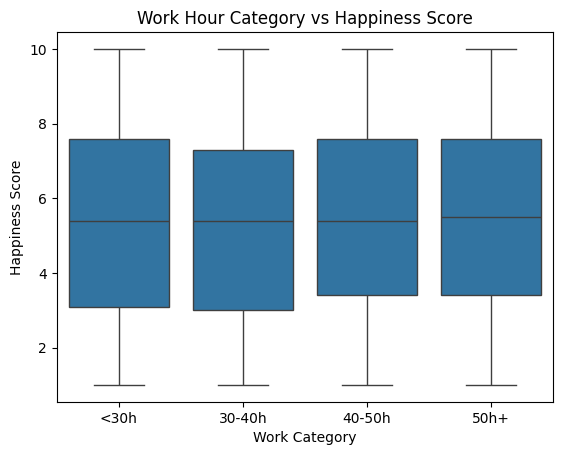

In [ ]:
df['Work Category'] = pd.cut(df['Work Hours per Week'], bins=[0, 30, 40, 50, 60],
                              labels=['<30h', '30-40h', '40-50h', '50h+'])

sns.boxplot(data=df, x='Work Category', y='Happiness Score')
plt.title('Work Hour Category vs Happiness Score')
plt.show()


##범주형 데이터 시각화
### col : 성별, 운동 강도, 식단, 스트레스, 정신건강상태

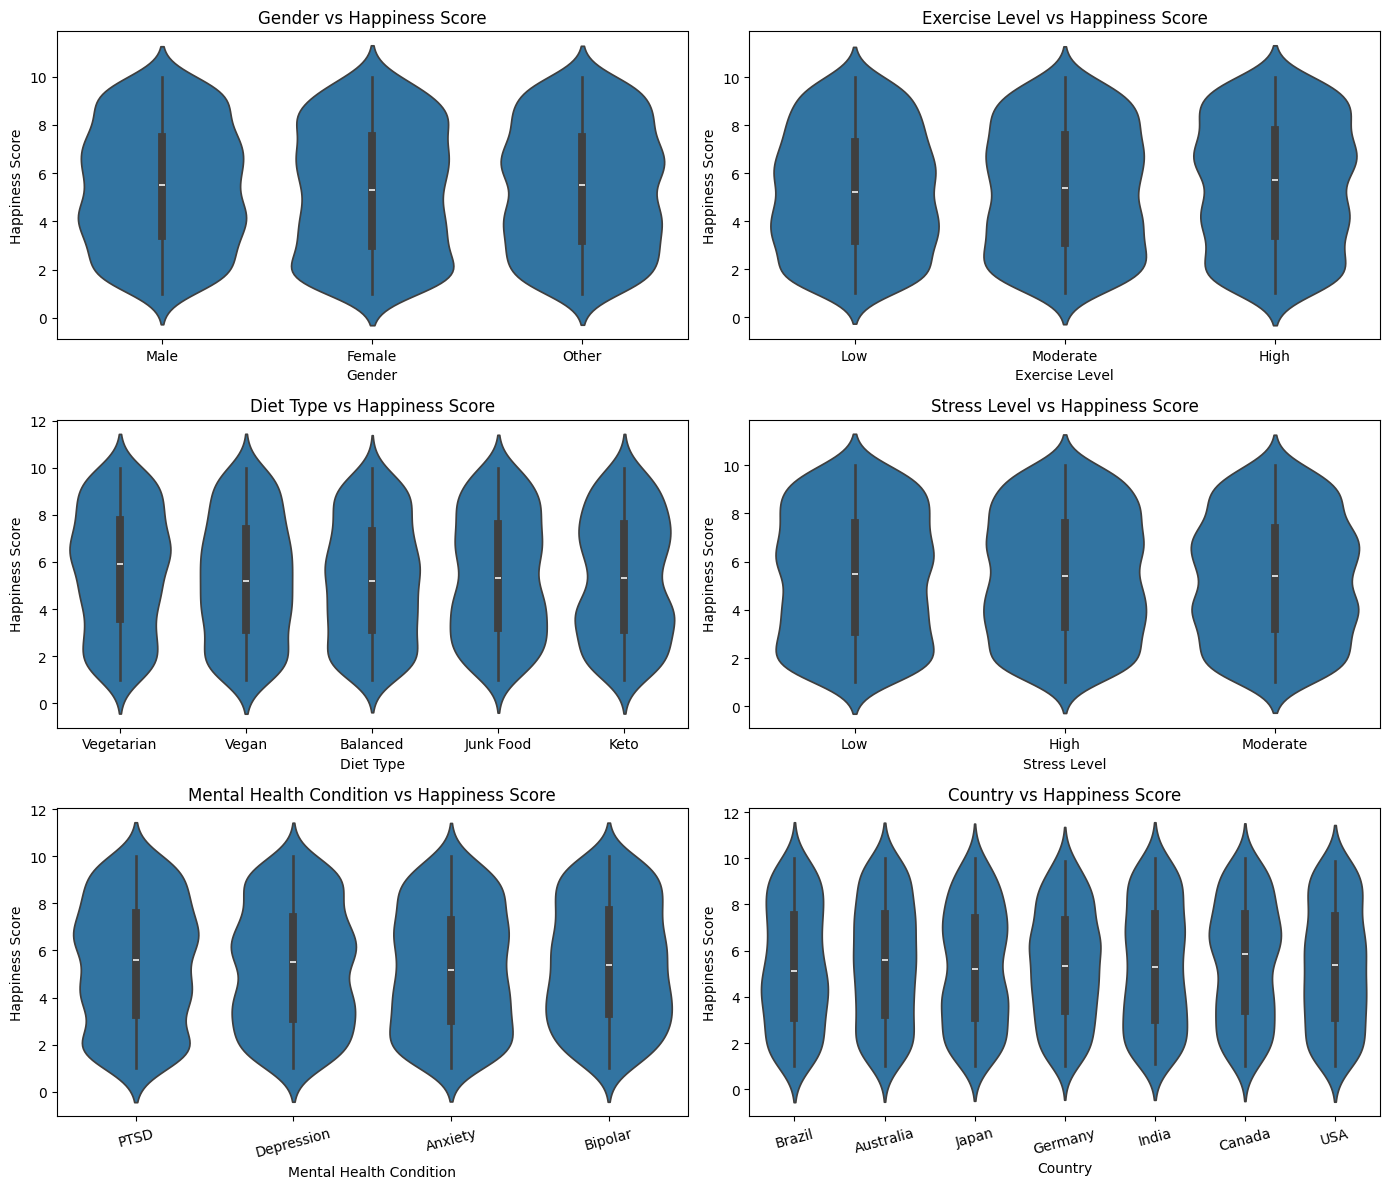

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Gender vs Happiness Score
sns.violinplot(data=df, x='Gender', y='Happiness Score', ax=axes[0, 0])
axes[0, 0].set_title('Gender vs Happiness Score')

# Exercise Level vs Happiness Score
sns.violinplot(data=df, x='Exercise Level', y='Happiness Score', ax=axes[0, 1])
axes[0, 1].set_title('Exercise Level vs Happiness Score')

# Diet Type vs Happiness Score
sns.violinplot(data=df, x='Diet Type', y='Happiness Score', ax=axes[1, 0])
axes[1, 0].set_title('Diet Type vs Happiness Score')

# Stress Level vs Happiness Score
sns.violinplot(data=df, x='Stress Level', y='Happiness Score', ax=axes[1, 1])
axes[1, 1].set_title('Stress Level vs Happiness Score')

# Mental Health Condition vs Happiness Score
sns.violinplot(data=df, x='Mental Health Condition', y='Happiness Score', ax=axes[2, 0])
axes[2, 0].set_title('Mental Health Condition vs Happiness Score')
axes[2, 0].tick_params(axis='x', rotation=15)

# Country vs Happiness Score
sns.violinplot(data=df, x='Country', y='Happiness Score', ax=axes[2, 1])
axes[2, 1].set_title('Country vs Happiness Score')
axes[2, 1].tick_params(axis='x', rotation=15)


plt.tight_layout()
plt.show()

박스 플롯 수치로 요약

In [ ]:
# 범주형 변수 리스트
cat_vars = ['Gender', 'Exercise Level', 'Diet Type', 'Stress Level', 'Mental Health Condition','Country']

# 각 변수에 대해 그룹별 통계 출력
for col in cat_vars:
    print(f"\n===== {col} 별 Happiness Score 요약 통계 =====")
    display(df.groupby(col)['Happiness Score'].describe())



===== Gender 별 Happiness Score 요약 통계 =====


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,1024.0,5.287109,2.607559,1.0,3.0,5.3,7.525,10.0
Male,980.0,5.474592,2.508310,1.0,3.4,5.5,7.500,10.0
Other,996.0,5.427811,2.552559,1.0,3.2,5.5,7.500,10.0



===== Exercise Level 별 Happiness Score 요약 통계 =====


,count,mean,std,min,25%,50%,75%,max
Exercise Level,,,,,,,,
High,969.0,5.545408,2.612913,1.0,3.4,5.7,7.800,10.0
Low,1033.0,5.289545,2.514190,1.0,3.2,5.2,7.300,10.0
Moderate,998.0,5.358317,2.543583,1.0,3.1,5.4,7.575,10.0



===== Diet Type 별 Happiness Score 요약 통계 =====


,count,mean,std,min,25%,50%,75%,max
Diet Type,,,,,,,,
Balanced,625.0,5.247680,2.511914,1.0,3.100,5.2,7.3,10.0
Junk Food,637.0,5.436264,2.550734,1.0,3.200,5.3,7.6,10.0
Keto,573.0,5.339616,2.561560,1.0,3.100,5.3,7.6,10.0
Vegan,573.0,5.287086,2.573855,1.0,3.100,5.2,7.4,10.0
Vegetarian,592.0,5.664527,2.579870,1.0,3.575,5.9,7.8,10.0



===== Stress Level 별 Happiness Score 요약 통계 =====


,count,mean,std,min,25%,50%,75%,max
Stress Level,,,,,,,,
High,1002.0,5.440419,2.547764,1.0,3.3,5.4,7.6,10.0
Low,1008.0,5.408631,2.606800,1.0,3.1,5.5,7.6,10.0
Moderate,990.0,5.335354,2.518101,1.0,3.2,5.4,7.4,10.0



===== Mental Health Condition 별 Happiness Score 요약 통계 =====


,count,mean,std,min,25%,50%,75%,max
Mental Health Condition,,,,,,,,
Anxiety,628.0,5.258121,2.555230,1.0,3.000,5.15,7.3,10.0
Bipolar,573.0,5.471553,2.534071,1.0,3.300,5.40,7.7,10.0
Depression,580.0,5.341552,2.535492,1.0,3.100,5.50,7.4,10.0
PTSD,624.0,5.457692,2.606506,1.0,3.275,5.60,7.6,10.0



===== Country 별 Happiness Score 요약 통계 =====


,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Australia,434.0,5.494240,2.591332,1.0,3.225,5.60,7.600,10.0
Brazil,415.0,5.335904,2.598845,1.0,3.100,5.10,7.550,10.0
Canada,428.0,5.559112,2.535516,1.0,3.375,5.85,7.600,10.0
Germany,404.0,5.368069,2.411880,1.0,3.400,5.35,7.325,9.9
India,434.0,5.378802,2.623779,1.1,3.000,5.30,7.600,10.0
Japan,439.0,5.279271,2.529543,1.0,3.100,5.20,7.400,10.0
USA,446.0,5.350448,2.603530,1.0,3.100,5.40,7.500,9.9


In [ ]:
df.columns


Index(['Country', 'Age', 'Gender', 'Exercise Level', 'Diet Type',
       'Sleep Hours', 'Stress Level', 'Mental Health Condition',
       'Work Hours per Week', 'Screen Time per Day (Hours)',
       'Social Interaction Score', 'Happiness Score'],
      dtype='object')

# 다변량 분석? 해보는 중

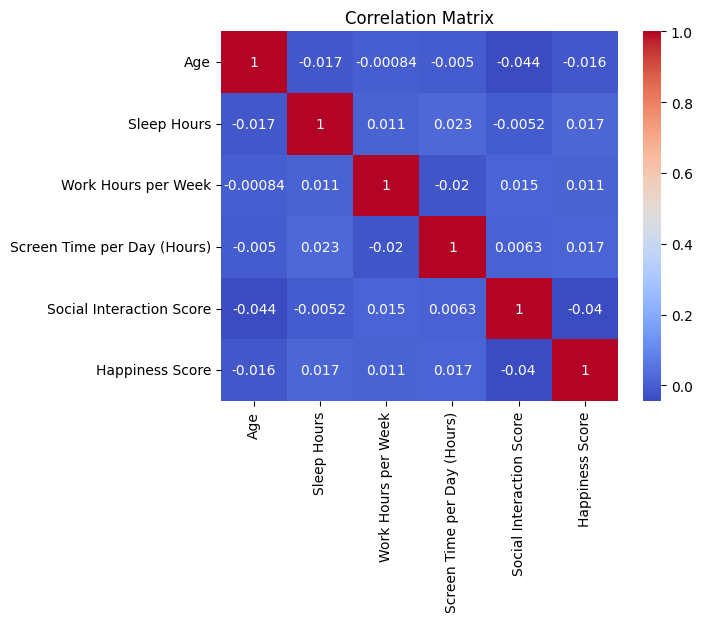

In [ ]:
# 연속형 변수들 간 상관관계 확인
num_cols = ['Age', 'Sleep Hours', 'Work Hours per Week',
            'Screen Time per Day (Hours)', 'Social Interaction Score',
            'Happiness Score']

sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# 상관계수 계산 (피어슨 기본값)
pearson_corr = df[num_cols].corr(method='pearson')
print("Pearson corr:")
print(pearson_corr['Happiness Score'].sort_values(ascending=False))


Pearson corr:
Happiness Score                1.000000
Sleep Hours                    0.017389
Screen Time per Day (Hours)    0.016790
Work Hours per Week            0.010837
Age                           -0.015862
Social Interaction Score      -0.040236
Name: Happiness Score, dtype: float64


In [ ]:
# 스피어만 상관계수 계산
spearman_corr = df[num_cols].corr(method='spearman')
print("Spearman corr:")
print(spearman_corr['Happiness Score'].sort_values(ascending=False))


Spearman corr:
Happiness Score                1.000000
Sleep Hours                    0.023233
Screen Time per Day (Hours)    0.017466
Work Hours per Week            0.010958
Age                           -0.016608
Social Interaction Score      -0.039710
Name: Happiness Score, dtype: float64


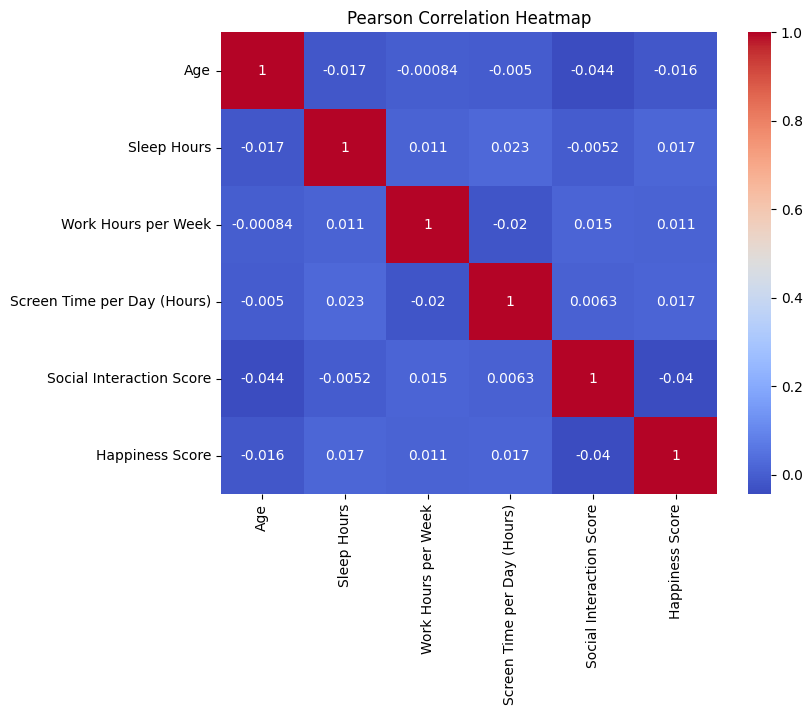

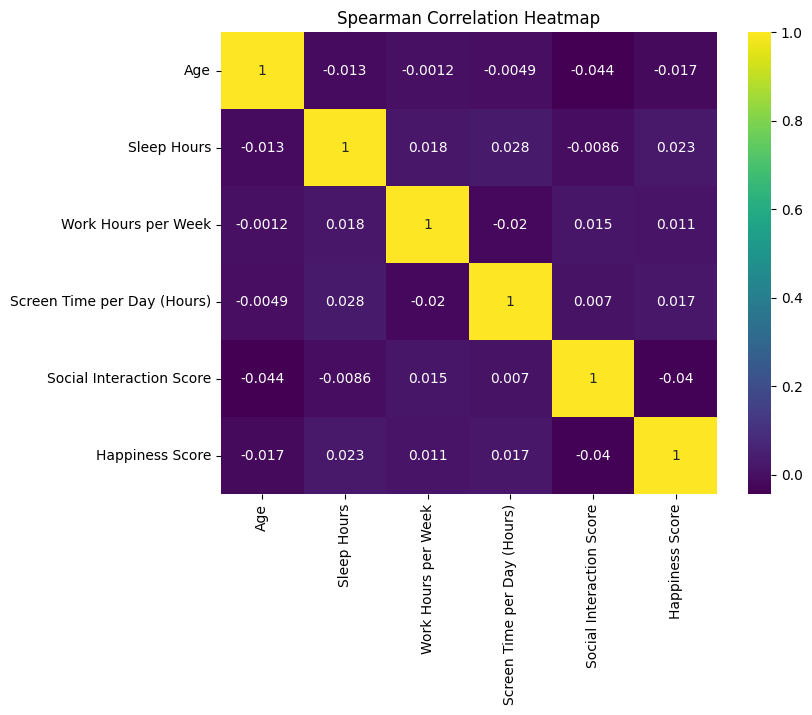

In [ ]:
cols = ['Age', 'Sleep Hours', 'Work Hours per Week',
        'Screen Time per Day (Hours)', 'Social Interaction Score', 'Happiness Score']

# 피어슨
plt.figure(figsize=(8, 6))
sns.heatmap(df[cols].corr(method='pearson'), annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Heatmap')
plt.show()

# 스피어만
plt.figure(figsize=(8, 6))
sns.heatmap(df[cols].corr(method='spearman'), annot=True, cmap='viridis')
plt.title('Spearman Correlation Heatmap')
plt.show()
